# Neural Network approach

## Getting the dataset  ready(work in progress)

In [1]:
import pandas as pd
my_csv = pd.read_csv(r"D:\Programming shit\Python\MachineLearningDatasets\creditcard.csv")

In [2]:
import numpy as np
my_csv['split'] = np.random.randn(my_csv.shape[0], 1)

In [83]:
selection = np.random.rand(len(my_csv)) <= 0.85

In [84]:
train_csv = my_csv[selection]
test_csv = my_csv[~selection]

In [85]:
trainreader = csv.reader(train_csv.drop(columns = ['Class','split']), delimiter='t')
testreader = csv.reader(test_csv.drop(columns = ['Class','split']), delimiter='t')
transaction_data_train = []
transaction_data_test = []
for i, line in enumerate(trainreader):
    transaction_data_train.append(line)
for i, line in enumerate(testreader): 
    transaction_data_test.append(line)

In [86]:
transaction_data_train = train_csv.drop(columns = ['Class','split'])
transaction_data_test = test_csv.drop(columns = ['Class','split'])

In [87]:
transaction_labels_train = list(train_csv['Class'])
transaction_labels_test = list(test_csv['Class'])

In [88]:
import torch

class CardTransactionsDataset(torch.utils.data.Dataset):
    def __init__(self,labels,transactions_csv):
        self.labels = labels
        self.data = transactions_csv
        
    def __len__(self):
        return len(self.labels)
    
    def __getitem__(self,idx):
        return self.data[idx],self.labels[idx]
        

In [93]:
from torchvision.transforms.functional import to_tensor

def my_collate(data):
    processed_data = []
    for line in data:
        line = to_tensor(line)
        line = line.unsqueeze(0)
        processed_data.append(line)
        newdata = torch.cat(processed_data,dim = 0)
        return newdata

In [94]:
training_data = CardTransactionsDataset(transaction_labels_train,transaction_data_train)
testing_data = CardTransactionsDataset(transaction_labels_test,transaction_data_test)

In [95]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size=1000, shuffle=True,collate_fn=my_collate)
test_dataloader = DataLoader(testing_data, batch_size=1000, shuffle=True,collate_fn=my_collate)

## Defining the network(research in progress)

In [ ]:
import torch.nn as nn

class MyDAE(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Linear(in_features = 30, out_features = 21)
        self.relu = nn.ReLU()
        self.layer2 = nn.Linear(in_features = 21, out_features = 14)
        self.layer3= nn.Linear(in_features = 14, out_features = 9)
        self.layer4= nn.Linear(in_features = 9, out_features = 14)
        self.layer5= nn.Linear(in_features = 14, out_features = 21)
        self.layer6= nn.Linear(in_features = 21, out_features = 30)
        
    def forward(self,x):
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.relu(self.layer5(x))
        x = self.relu(self.layer6(x))
        return x

In [ ]:
class CardNet(nn.Module):
    def __init__(self):
        super().__init__()
        self.dae = MyDAE()
        self.relu = nn.ReLU()
        self.soft = nn.Softmax()
        self.layer1 = nn.Linear(in_features = 30, out_features = 20)
        self.layer2 = nn.Linear(in_features = 20, out_features = 15)
        self.layer3 = nn.Linear(in_features = 15, out_features = 10)
        self.layer4 = nn.Linear(in_features = 10, out_features = 5)
        self.layer5 = nn.Linear(in_features = 5, out_features = 2)
        
    def forward(self,x):
        x = self.dae(x)
        x = self.relu(self.layer1(x))
        x = self.relu(self.layer2(x))
        x = self.relu(self.layer3(x))
        x = self.relu(self.layer4(x))
        x = self.soft(self.layer5(x))
        return x

## Actual training

In [ ]:
import torch.optim as optim

epochs = 50

cardNet = CardNet()

optimiser = optim.Adam(params= cardNet.parameters(),lr = 1e-3)

optimiser.zero_grad()

loss = nn.CrossEntropyLoss

In [ ]:
def compute_accuracy(net: nn.Module, test_loader: DataLoader):
    net.eval()
    total = 0
    correct = 0
    for test_transaction, test_labels in test_loader:
        total += len(test_images)
        out_class = torch.argmax(net(test_images))
        correct += torch.sum(out_class == test_labels)

    return correct / total * 100

In [ ]:
for e in range(epochs):
    net.train()
    for transaction, labels in train_dataloader:
        out = cardNet(transaction)
        labels = torch.reshape(labels)
        loss = loss_fn(out, labels)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    print("Loss-ul la finalul epocii {} are valoarea {}".format(e, loss.item()))
    acc = test_acc(cardNet, test_dataloader)
    print("Acuratetea la finalul epocii {} este {:.2f}%".format(e + 1, acc))

# KNN approach

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [4]:
my_csv2 = pd.read_csv(r"D:\Programming shit\Python\MachineLearningDatasets\creditcard.csv")

In [5]:
transactions = my_csv2.iloc[:,0:30]
labels = my_csv2.iloc[:,30]
training_transactions, testing_transactions,training_labels,testing_labels = train_test_split(transactions,labels,test_size = .15)

In [6]:
transactions_scaling = StandardScaler()
training_transactions = transactions_scaling.fit_transform(training_transactions)
testing_transactions = transactions_scaling.fit_transform(testing_transactions)

In [7]:
from math import sqrt,trunc
import datetime
def checkprime(x):
    for j in range(2,trunc(sqrt(x))):
        if x%j == 0:
            return False
    return True
f1_scores = []
k_values = []
accuracy_scores = []
for i in range(trunc(sqrt(sqrt(training_transactions.shape[0]))),trunc(sqrt(training_transactions.shape[0]))):
    if checkprime(i):
        k_values.append(i)
        
        
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors = k,p = 2,metric = 'euclidean')
    knn.fit(training_transactions,training_labels)
    predicted_labels = knn.predict(testing_transactions)
    f1_scores.append(f1_score(testing_labels,predicted_labels))
    accuracy_scores.append(accuracy_score(testing_labels,predicted_labels))


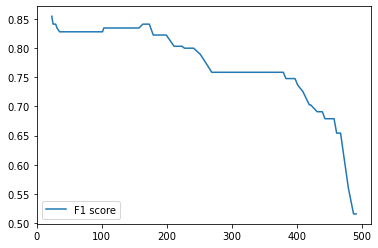

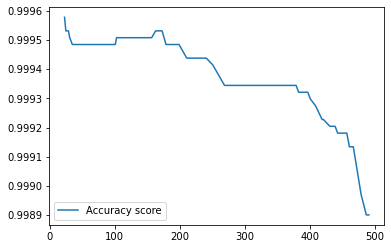

In [14]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(k_values, f1_scores,label='F1 score')
plt.legend(loc="lower left")
#plt.set(xlabel='Neighbours', ylabel='F1 score',label='F1 score evolution for different numbers of neighbors')
plt.show()
plt.figure(1)
plt.plot(k_values, accuracy_scores,label='Accuracy score')
plt.legend(loc="lower left")
#plt.set(xlabel='Neighbours', ylabel='Accuracy score',title='Accuracy score evolution for different numbers of neighbors')
plt.show()

In [15]:
print(f1_scores)

[0.8548387096774194, 0.8412698412698412, 0.8412698412698412, 0.8346456692913387, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8281250000000001, 0.8346456692913387, 0.8346456692913387, 0.8346456692913387, 0.8346456692913387, 0.8346456692913387, 0.8346456692913387, 0.8346456692913387, 0.8346456692913387, 0.8346456692913387, 0.8346456692913387, 0.8346456692913387, 0.8346456692913387, 0.8346456692913387, 0.8412698412698412, 0.8412698412698412, 0.8412698412698412, 0.8412698412698412, 0.8225806451612904, 0.8225806451612904, 0.8225806451612904, 0.8225806451612904, 0.8225806451612904, 0.8225806451612904, 0.8032786885245902, 0.8032786885245902, 0.8, 0.8, 0.8, 0.8, 0.8, 0.7899159663865546, 0.7796610169491526, 0.769230769230

In [16]:
print(accuracy_scores)

[0.9995786714105145, 0.9995318571227939, 0.9995318571227939, 0.9995084499789336, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9995084499789336, 0.9995084499789336, 0.9995084499789336, 0.9995084499789336, 0.9995084499789336, 0.9995084499789336, 0.9995084499789336, 0.9995084499789336, 0.9995084499789336, 0.9995084499789336, 0.9995084499789336, 0.9995084499789336, 0.9995084499789336, 0.9995318571227939, 0.9995318571227939, 0.9995318571227939, 0.9995318571227939, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994850428350732, 0.9994382285473526, 0.9994382285473526, 0.9994382285473526, 0.9994382285473526, 0.9994382285473526, 0.9994382285473526,

In [17]:
for k in range(2,22):
    if checkprime(k):
        k_values = [k] + k_values
        knn = KNeighborsClassifier(n_neighbors = k,p = 2,metric = 'euclidean')
        knn.fit(training_transactions,training_labels)
        predicted_labels = knn.predict(testing_transactions)
        f1_scores= [f1_score(testing_labels,predicted_labels)] + f1_scores
        accuracy_scores = [accuracy_score(testing_labels,predicted_labels)] + accuracy_scores


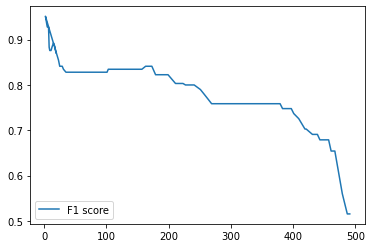

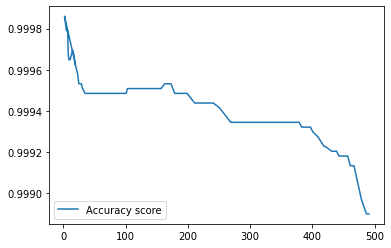

In [18]:
import matplotlib.pyplot as plt
plt.figure(0)
plt.plot(k_values, f1_scores,label='F1 score')
plt.legend(loc="lower left")
plt.show()
plt.figure(1)
plt.plot(k_values, accuracy_scores,label='Accuracy score')
plt.legend(loc="lower left")
plt.show()